In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df3 = pd.read_csv("./bases/wdi/Indicators.csv")
df4 = pd.read_csv("./bases/suicide/master_total_population.csv")
df5 = pd.read_csv("./bases/suicide/suicidio_feminino1000.csv")
df6 = pd.read_csv("./bases/suicide/suicidio_feminino100000.csv")

In [77]:
dfSuicidesFinal = df4[(df4["country"] == "Brazil")]
filtroSuicMax = dfSuicidesFinal.year < 2015
dfSuicidesFinal = dfSuicidesFinal[filtroSuicMax].reset_index(drop=True)


In [93]:
#Adolescent fertility rate (births per 1,000 women ages 15-19)
filtroFertility = df3.IndicatorCode.isin(["SP.ADO.TFRT"]);
filtroPais = df3.CountryName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay']);
filtroMin = df3.Year > 1999 
filtroMax = df3.Year < 2015
dfFertility =  df3[filtroPais & filtroFertility & filtroMin & filtroMax]
dfFertility = dfFertility[["CountryName", "Year", "Value"]]
dfFertility = dfFertility.sort_values(by=["CountryName", "Year"])
dfFertility = dfFertility[(dfFertility["CountryName"] == "Brazil")].reset_index(drop=True)
dfFertility.rename(columns={'CountryName':'country','Year':'anos', 'Year':'anos', 'Value': 'nascimentos'}, inplace=True)
dfAgeSex1000 = df5[['suicide100', 'year']].rename(columns={'suicide100':'suicídios/1000', 'year': 'anos'})
dfAgeSex100000 = df6[['suicide100', 'year']].rename(columns={'suicide100': "suicídios/100k", 'year': 'anos'})


In [79]:
dfFertility 

,country,year,birthRate
0,Brazil,2000,81.9998
1,Brazil,2001,81.4734
2,Brazil,2002,80.9470
3,Brazil,2003,78.9338
4,Brazil,2004,76.9206
5,Brazil,2005,74.9074
6,Brazil,2006,72.8942
7,Brazil,2007,70.8810
8,Brazil,2008,70.3938
9,Brazil,2009,69.9066


In [80]:
dfSuicidesFinal

,country,year,population,suicides,suicides100
0,Brazil,2000,175287587.0,6763.0,3.858231
1,Brazil,2001,177750670.0,7710.0,4.337536
2,Brazil,2002,180151021.0,7697.0,4.272526
3,Brazil,2003,182482149.0,7839.0,4.295763
4,Brazil,2004,184738458.0,7995.0,4.327740
5,Brazil,2005,186917361.0,8529.0,4.562979
6,Brazil,2006,189012412.0,8618.0,4.559489
7,Brazil,2007,191026637.0,8855.0,4.635479
8,Brazil,2008,192979029.0,9184.0,4.759066
9,Brazil,2009,194895996.0,9346.0,4.795378


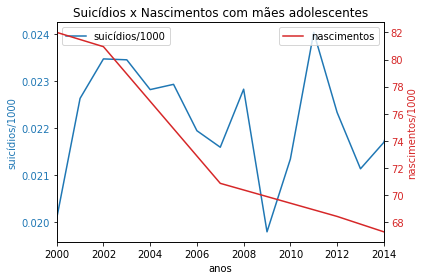

In [97]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

color = 'tab:blue'
ax1.set_xlabel('anos')
ax1.set_ylabel('suicídios/1000', color=color)
dfAgeSex1000.plot(ax=ax1, x='anos', y='suicídios/1000', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('nascimentos/1000', color=color)  # we already handled the x-label with ax1
dfFertility[['nascimentos', 'anos']].plot(ax=ax2, x='anos', y='nascimentos' , color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Suicídios x Nascimentos com mães adolescentes')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

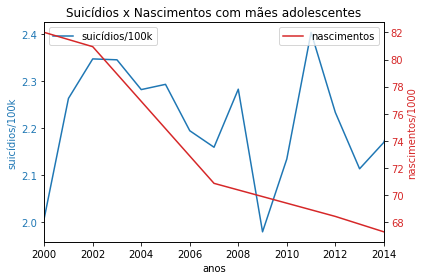

In [95]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

color = 'tab:blue'
ax1.set_xlabel('anos')
ax1.set_ylabel('suicídios/100k', color=color)
dfAgeSex100000.plot(ax=ax1, x='anos', y='suicídios/100k', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('nascimentos/1000', color=color)  # we already handled the x-label with ax1
dfFertility[['nascimentos', 'anos']].plot(ax=ax2, x='anos', y='nascimentos' , color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Suicídios x Nascimentos com mães adolescentes')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()